# Análisis de Casos de COVID-19

Este notebook está diseñado para guiarte paso a paso en el análisis de un conjunto de datos reales sobre casos de COVID-19 en distintas provincias y ciudades. Aprenderás a cargar, inspeccionar, limpiar y visualizar datos usando Python y librerías populares como pandas y matplotlib.

## 1. Carga de datos

Primero, importamos las librerías necesarias y cargamos el archivo `CovidCases.csv`.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Cargar el archivo CSV
df = pd.read_csv("data/CovidCases.csv")
df = df.where(df['latitude'] != '-').dropna()
df.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001.0,Seoul,Yongsan-gu,True,Itaewon Clubs,139.0,37.538621,126.992652
1,1000002.0,Seoul,Gwanak-gu,True,Richway,119.0,37.48208,126.901384
2,1000003.0,Seoul,Guro-gu,True,Guro-gu Call Center,95.0,37.508163,126.884387
3,1000004.0,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43.0,37.546061,126.874209
4,1000005.0,Seoul,Dobong-gu,True,Day Care Center,43.0,37.679422,127.044374


## 2. Inspección inicial de los datos

Veamos la estructura del DataFrame, los nombres de las columnas y los tipos de datos.

In [21]:
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65 entries, 0 to 164
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0    case_id        65 non-null     float64
 1   province        65 non-null     object 
 2   city            65 non-null     object 
 3   group           65 non-null     object 
 4   infection_case  65 non-null     object 
 5   confirmed       65 non-null     float64
 6   latitude        65 non-null     float64
 7   longitude       65 non-null     float64
dtypes: float64(4), object(4)
memory usage: 4.6+ KB


In [22]:
df.describe(include="all")

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
count,6.500000e+01,65,65,65,65,65.000000,65.000000,65.000000
unique,NaN,13,43,1,64,NaN,NaN,NaN
top,NaN,Seoul,Seo-gu,True,Manmin Central Church,NaN,NaN,NaN
freq,NaN,23,5,65,2,NaN,NaN,NaN
mean,2.446162e+06,NaN,NaN,NaN,NaN,100.323077,36.694051,127.584885
std,1.993979e+06,NaN,NaN,NaN,NaN,557.114191,0.911466,0.823087
min,1.000001e+06,NaN,NaN,NaN,NaN,0.000000,35.078825,126.316746
25%,1.000024e+06,NaN,NaN,NaN,NaN,6.000000,35.848190,126.956405
50%,1.300001e+06,NaN,NaN,NaN,NaN,13.000000,37.000354,127.113900
75%,4.000001e+06,NaN,NaN,NaN,NaN,41.000000,37.522331,128.466653


## 3. Limpieza de datos

Buscamos valores nulos o inconsistentes, especialmente en las columnas de latitud y longitud.

En este dataset, los valores faltantes están representados por el carácter '-', así que los reemplazaremos por NaN y convertiremos las columnas a tipo numérico.

In [19]:
import numpy as np

df["latitude"] = pd.to_numeric(df["latitude"], errors="coerce")
df["longitude"] = pd.to_numeric(df["longitude"], errors="coerce")

df.isnull().sum()

 case_id          0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

## 4. Análisis exploratorio

### 4.1. Casos confirmados por provincia

Agrupamos los datos por provincia y sumamos los casos confirmados.

In [26]:
provincia_casos = df.groupby("province")["confirmed"].sum().sort_values(ascending=False)
provincia_casos

province
Daegu                4971.0
Seoul                 620.0
Gyeongsangbuk-do      362.0
Gyeonggi-do           270.0
Chungcheongnam-do     112.0
Busan                  54.0
Gyeongsangnam-do       44.0
Sejong                 39.0
Daejeon                27.0
Chungcheongbuk-do      11.0
Gwangju                 5.0
Gangwon-do              4.0
Jeollanam-do            2.0
Name: confirmed, dtype: float64

### 4.2. Visualización de casos confirmados por provincia

/tmp/ipykernel_27512/1401849106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=provincia_casos.values, y=provincia_casos.index, palette="viridis")


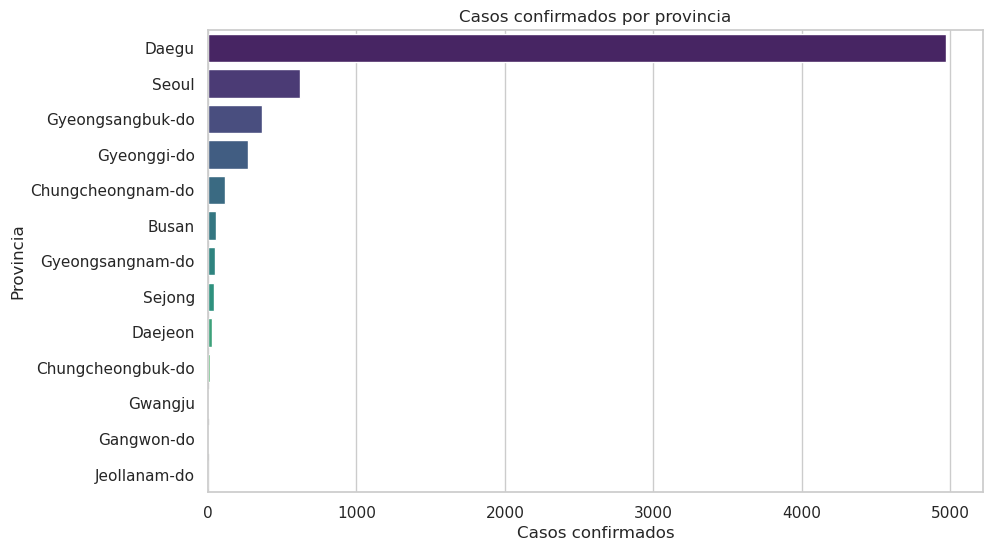

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=provincia_casos.values, y=provincia_casos.index, palette="viridis")
plt.title("Casos confirmados por provincia")
plt.xlabel("Casos confirmados")
plt.ylabel("Provincia")
plt.show()

### 4.3. Tipos de focos de infección más frecuentes

¿Cuáles son los principales focos de infección reportados en el dataset?

In [29]:
focos = df["infection_case"].value_counts().head(10)
focos

infection_case
Manmin Central Church            2
Itaewon Clubs                    1
Guro-gu Call Center              1
Richway                          1
Yangcheon Table Tennis Club      1
Day Care Center                  1
Dongan Church                    1
Wangsung Church                  1
Eunpyeong St. Mary's Hospital    1
Seongdong-gu APT                 1
Name: count, dtype: int64

/tmp/ipykernel_27512/2418388003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=focos.values, y=focos.index, palette="magma")


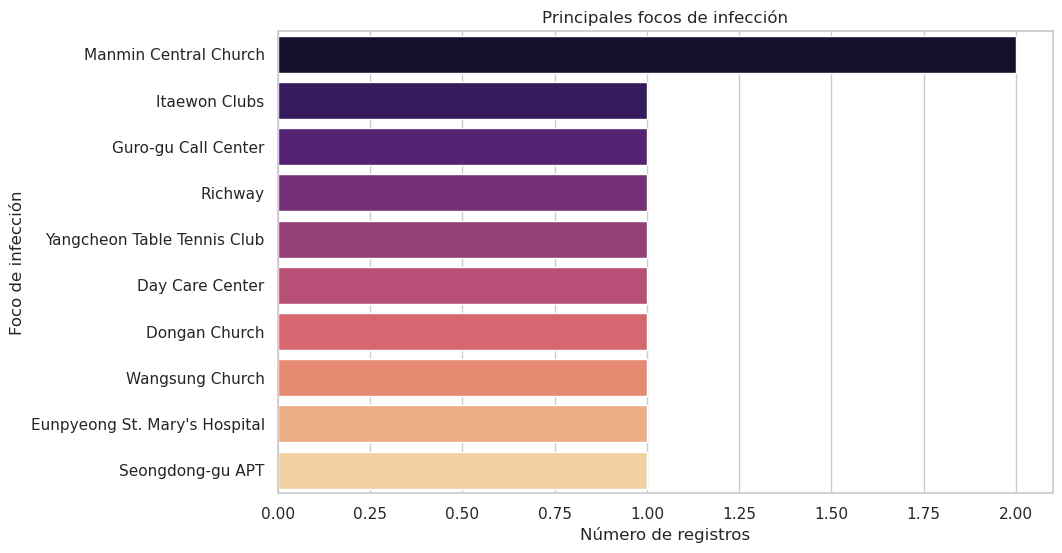

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=focos.values, y=focos.index, palette="magma")
plt.title("Principales focos de infección")
plt.xlabel("Número de registros")
plt.ylabel("Foco de infección")
plt.show()

## 5. Análisis de grupos de infección

Veamos cómo se distribuyen los casos entre los diferentes grupos de infección.

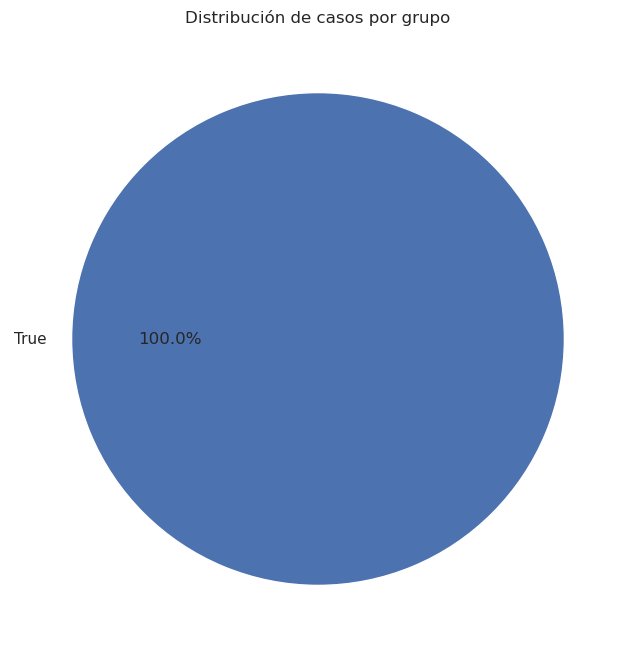

In [31]:
grupo_casos = df.groupby("group")["confirmed"].sum()
plt.figure(figsize=(8, 8))
plt.pie(grupo_casos, labels=grupo_casos.index, autopct="%1.1f%%")
plt.title("Distribución de casos por grupo")
plt.show()

## 6. Análisis de ciudades

Identifiquemos las ciudades con mayor número de casos confirmados.

/tmp/ipykernel_27512/1122060428.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ciudad_casos.values, y=ciudad_casos.index, palette="plasma")


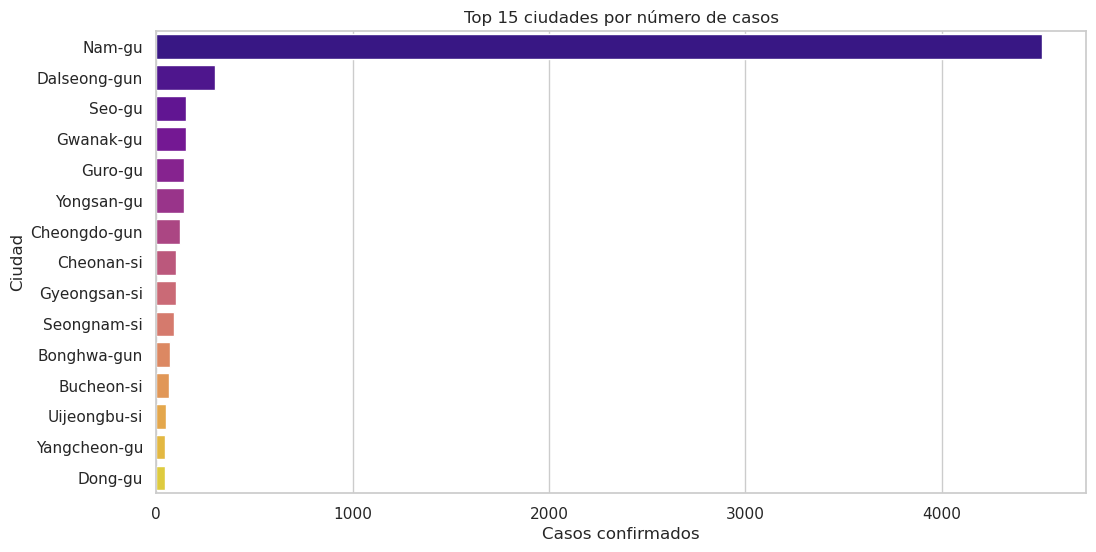

In [32]:
ciudad_casos = (
    df.groupby("city")["confirmed"].sum().sort_values(ascending=False).head(15)
)
plt.figure(figsize=(12, 6))
sns.barplot(x=ciudad_casos.values, y=ciudad_casos.index, palette="plasma")
plt.title("Top 15 ciudades por número de casos")
plt.xlabel("Casos confirmados")
plt.ylabel("Ciudad")
plt.show()

## 7. Análisis de correlación

Veamos si existe alguna correlación entre las variables numéricas del dataset.

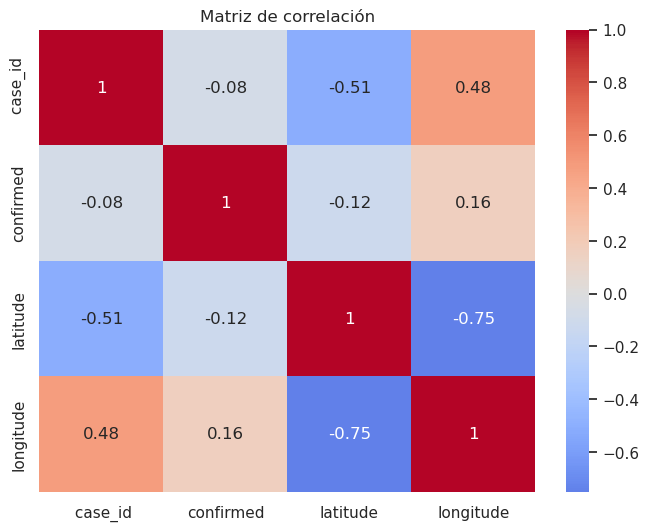

In [41]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

## 8. Comparación con Excel: Funciones y Operaciones Comunes

En esta sección, veremos cómo realizar operaciones comunes de Excel usando Python. Esto te ayudará a entender las similitudes y diferencias entre ambos enfoques.

### 8.1. Tablas Dinámicas (Pivot Tables)

En Excel, las tablas dinámicas son una herramienta poderosa para resumir datos. En Python, podemos lograr lo mismo usando `pivot_table` de pandas.

**En Excel:**
- Seleccionar datos
- Insertar > Tabla dinámica
- Arrastrar campos a filas, columnas y valores

**En Python:**
Usamos el método `pivot_table` con parámetros similares:

In [42]:
# Crear una tabla dinámica similar a Excel
pivot = pd.pivot_table(
    df, values="confirmed", index="province", columns="group", aggfunc="sum"
)
pivot

group,True
province,
Busan,54.0
Chungcheongbuk-do,11.0
Chungcheongnam-do,112.0
Daegu,4971.0
Daejeon,27.0
Gangwon-do,4.0
Gwangju,5.0
Gyeonggi-do,270.0
Gyeongsangbuk-do,362.0


### 8.2. Filtros y Búsquedas

**En Excel:**
- Usar Filtro automático
- Fórmulas como BUSCARV, INDICE, COINCIDIR

**En Python:**
Podemos usar operaciones de filtrado y búsqueda de manera similar:

In [43]:
# Filtro similar a Excel
filtro_casos = df[df["confirmed"] > 100]
print("Casos con más de 100 confirmados:")
filtro_casos[["province", "city", "confirmed"]].head()

Casos con más de 100 confirmados:


,province,city,confirmed
0,Seoul,Yongsan-gu,139.0
1,Seoul,Gwanak-gu,119.0
48,Daegu,Nam-gu,4511.0
49,Daegu,Dalseong-gun,196.0
50,Daegu,Seo-gu,124.0


### 8.3. Funciones de Agregación

**En Excel:**
- SUMAR.SI, CONTAR.SI, PROMEDIO.SI
- Subtotales

**En Python:**
Podemos usar `groupby` con diferentes funciones de agregación:

In [14]:
# Similar a SUMAR.SI en Excel
suma_por_provincia = df.groupby("province")["confirmed"].sum()
print("Suma de casos por provincia:")
suma_por_provincia

Suma de casos por provincia:


province
Busan                 156
Chungcheongbuk-do      60
Chungcheongnam-do     158
Daegu                6680
Daejeon               131
Gangwon-do             62
Gwangju                43
Gyeonggi-do          1000
Gyeongsangbuk-do     1324
Gyeongsangnam-do      132
Incheon               202
Jeju-do                19
Jeollabuk-do           23
Jeollanam-do           25
Sejong                 49
Seoul                1280
Ulsan                  51
Name: confirmed, dtype: int64

### 8.4. Gráficos y Visualizaciones

**En Excel:**
- Gráficos de barras, líneas, pastel
- Gráficos combinados

**En Python:**
Podemos crear visualizaciones similares usando matplotlib y seaborn:

/tmp/ipykernel_223405/766525360.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


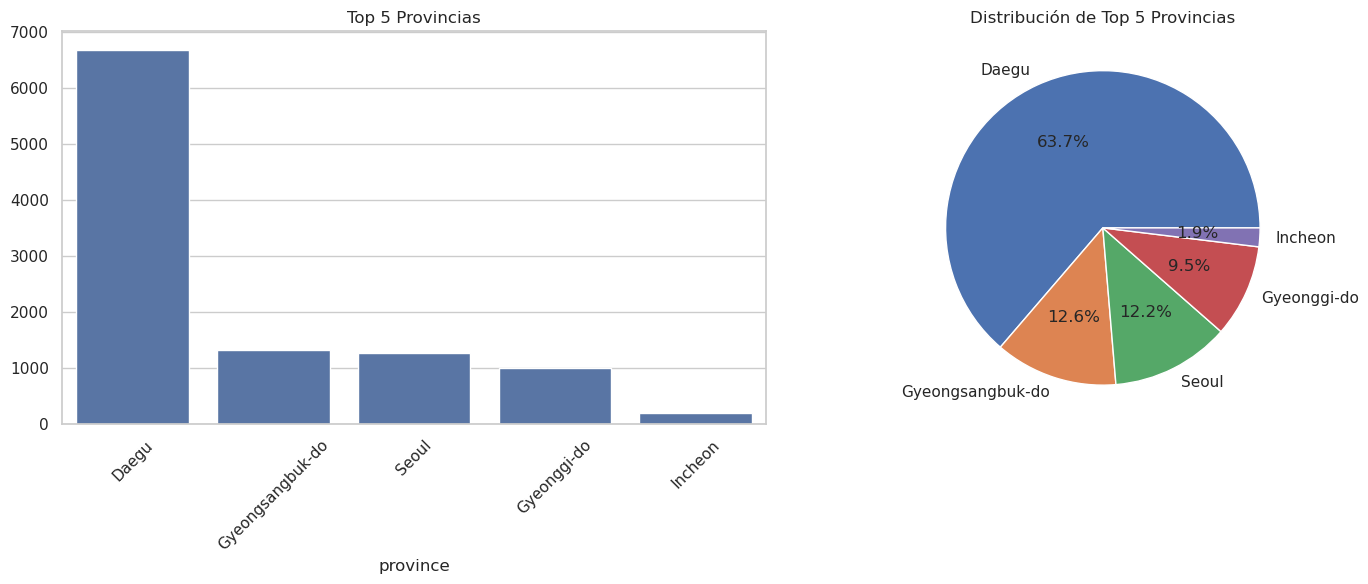

In [15]:
# Gráfico combinado similar a Excel
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
sns.barplot(x=provincia_casos.index[:5], y=provincia_casos.values[:5], ax=ax1)
ax1.set_title("Top 5 Provincias")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Gráfico de pastel
ax2.pie(provincia_casos.values[:5], labels=provincia_casos.index[:5], autopct="%1.1f%%")
ax2.set_title("Distribución de Top 5 Provincias")

plt.tight_layout()
plt.show()

## 9. Conclusiones

Basado en nuestro análisis, podemos concluir:

1. Las provincias con mayor número de casos son...
2. Los principales focos de infección son...
3. La distribución de casos por grupo muestra...
4. Las ciudades más afectadas son...

Este análisis nos permite entender mejor la distribución y características de los casos de COVID-19 en el dataset.